Saving nba_traditional_stats_2024_2025.csv to nba_traditional_stats_2024_2025.csv
Using file: nba_traditional_stats_2024_2025.csv
Filtered to 422 players for 2024-25 Regular Season
Sample Foul Discipline table:


,PLAYER,TEAM,GP,MIN,PF,PF_per36
0,Trey Jemison III,LAL,38,392,69,6.336735
1,Paul Reed,DET,45,438,75,6.164384
2,Alex Len,LAL,46,380,56,5.305263
3,Donovan Clingan,POR,67,1324,189,5.138973
4,Jae'Sean Tate,HOU,52,588,82,5.020408
5,Adem Bona,PHI,58,905,125,4.972376
6,Kelly Olynyk,NOP,44,891,123,4.969697
7,Dwight Powell,DAL,55,551,75,4.900181
8,Mo Bamba,NOP,32,413,56,4.881356
9,Zach Collins,CHI,64,977,132,4.863869



Top Most Foul-Prone Players (PF per 36):


,PLAYER,TEAM,GP,MIN,PF,PF_per36
0,Trey Jemison III,LAL,38,392,69,6.336735
1,Paul Reed,DET,45,438,75,6.164384
2,Alex Len,LAL,46,380,56,5.305263
3,Donovan Clingan,POR,67,1324,189,5.138973
4,Jae'Sean Tate,HOU,52,588,82,5.020408
5,Adem Bona,PHI,58,905,125,4.972376
6,Kelly Olynyk,NOP,44,891,123,4.969697
7,Dwight Powell,DAL,55,551,75,4.900181
8,Mo Bamba,NOP,32,413,56,4.881356
9,Zach Collins,CHI,64,977,132,4.863869



Top Most Disciplined Players (Lowest PF per 36):


,PLAYER,TEAM,GP,MIN,PF,PF_per36
421,Tyus Jones,PHX,81,2174,63,1.043238
420,Jimmy Butler III,GSW,55,1746,52,1.072165
419,Tyler Herro,MIA,77,2725,85,1.122936
418,Harrison Barnes,SAS,82,2230,75,1.210762
417,Tyrese Haliburton,IND,73,2450,92,1.351837
416,Jordan Hawkins,NOP,56,1320,51,1.390909
415,Delon Wright,NYK,40,635,25,1.417323
414,Luke Kennard,MEM,65,1472,59,1.442935
413,Monté Morris,PHX,45,571,23,1.450088
412,LeBron James,LAL,70,2444,99,1.458265


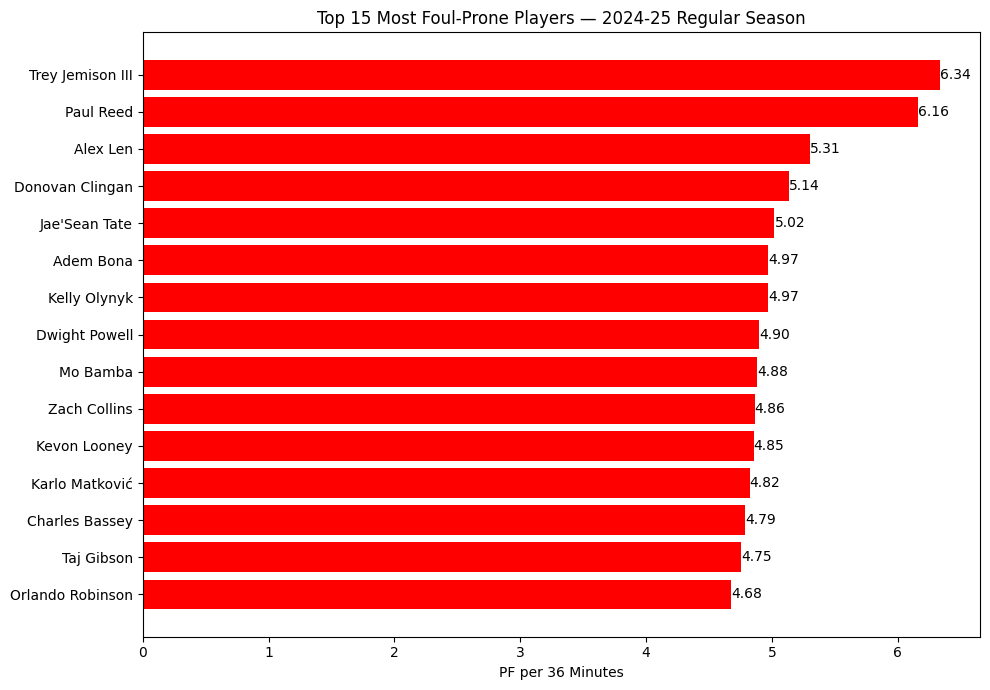

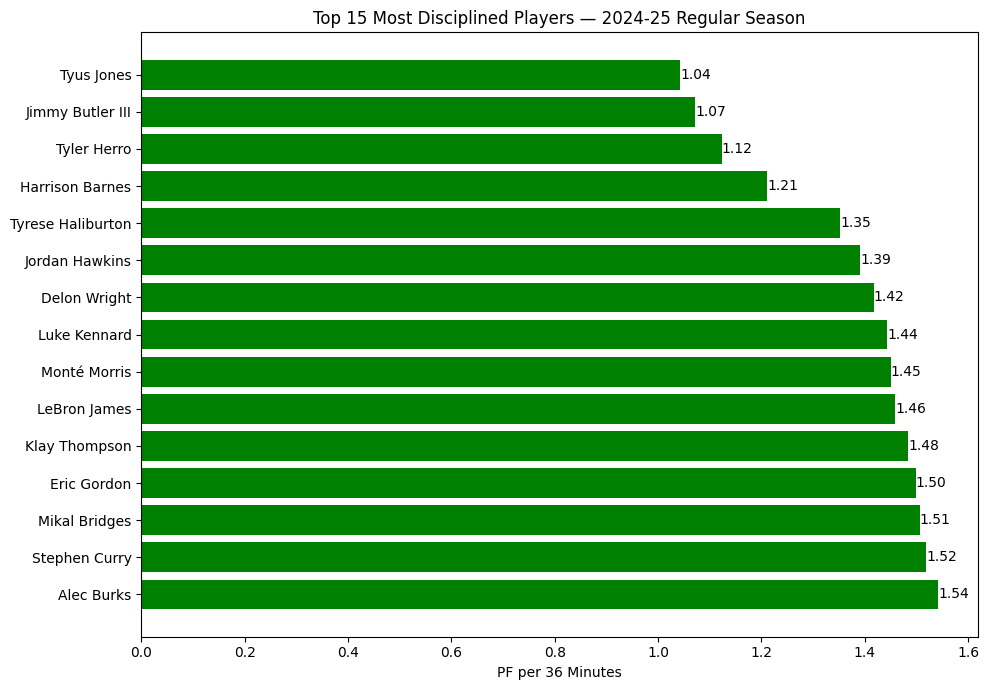


Saved:
- foul_discipline_2024_25.csv (full table)
- leaders_pf_per36_foul_prone_2024_25.csv (top foul-prone)
- leaders_pf_per36_disciplined_2024_25.csv (most disciplined)
- top_pf_per36_foul_prone.png
- top_pf_per36_disciplined.png


In [1]:
# 🏀 Foul Discipline (PF per 36) — 2024-25 Regular Season
# ------------------------------------------------------------
# Dataset columns used:
# PLAYER, TEAM, Year, Season Type, GP, MIN, PF
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)

# ================================
# 1) Load CSV (Colab or Local)
# ================================
try:
    from google.colab import files
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]
except:
    file_path = "nba_traditional_stats_2024_2025.csv"   # <-- replace if running locally

print("Using file:", file_path)
df = pd.read_csv(file_path)
df.columns = [c.strip() for c in df.columns]

# Clean Season Type text
if "Season Type" in df.columns:
    df["Season Type"] = df["Season Type"].astype(str).str.replace("%20", " ", regex=False)

# Ensure numeric
num_cols = ["GP","MIN","PF"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# ================================
# 2) Filter to 2024-25 Regular Season
# ================================
df_use = df[(df["Year"] == "2024-25") &
            (df["Season Type"].str.lower() == "regular season")].copy()

# Minimum filters
MIN_GP = 20
MIN_MINUTES = 300

df_use = df_use[(df_use["GP"] >= MIN_GP) &
                (df_use["MIN"] >= MIN_MINUTES)].copy()

print(f"Filtered to {len(df_use)} players for 2024-25 Regular Season")

# ================================
# 3) Compute PF per 36
# ================================
df_use["PF_per36"] = np.where(df_use["MIN"] > 0, (df_use["PF"] / df_use["MIN"]) * 36, np.nan)

cols_out = ["PLAYER","TEAM","GP","MIN","PF","PF_per36"]
foul_tbl = (df_use[cols_out]
            .sort_values("PF_per36", ascending=False)
            .reset_index(drop=True))

print("Sample Foul Discipline table:")
display(foul_tbl.head(10))

# ================================
# 4) Leaderboards
# ================================
TOPN = 15
# Most foul-prone players
leaders_foul = foul_tbl.head(TOPN)

# Most disciplined (lowest PF per 36)
leaders_clean = foul_tbl.sort_values("PF_per36", ascending=True).head(TOPN)

print("\nTop Most Foul-Prone Players (PF per 36):")
display(leaders_foul)

print("\nTop Most Disciplined Players (Lowest PF per 36):")
display(leaders_clean)

# ================================
# 5) Plots
# ================================
plt.figure(figsize=(10, 7))
plt.barh(leaders_foul["PLAYER"][::-1], leaders_foul["PF_per36"][::-1], color="red")
for i, v in enumerate(leaders_foul["PF_per36"][::-1]):
    plt.text(v, i, f"{v:.2f}", va="center", ha="left")
plt.xlabel("PF per 36 Minutes")
plt.title(f"Top {TOPN} Most Foul-Prone Players — 2024-25 Regular Season")
plt.tight_layout()
plt.savefig("top_pf_per36_foul_prone.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 7))
plt.barh(leaders_clean["PLAYER"][::-1], leaders_clean["PF_per36"][::-1], color="green")
for i, v in enumerate(leaders_clean["PF_per36"][::-1]):
    plt.text(v, i, f"{v:.2f}", va="center", ha="left")
plt.xlabel("PF per 36 Minutes")
plt.title(f"Top {TOPN} Most Disciplined Players — 2024-25 Regular Season")
plt.tight_layout()
plt.savefig("top_pf_per36_disciplined.png", dpi=300)
plt.show()

# ================================
# 6) Save Outputs
# ================================
foul_tbl.to_csv("foul_discipline_2024_25.csv", index=False)
leaders_foul.to_csv("leaders_pf_per36_foul_prone_2024_25.csv", index=False)
leaders_clean.to_csv("leaders_pf_per36_disciplined_2024_25.csv", index=False)

print("\nSaved:")
print("- foul_discipline_2024_25.csv (full table)")
print("- leaders_pf_per36_foul_prone_2024_25.csv (top foul-prone)")
print("- leaders_pf_per36_disciplined_2024_25.csv (most disciplined)")
print("- top_pf_per36_foul_prone.png")
print("- top_pf_per36_disciplined.png")